In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [7]:
# Load data
df = pd.read_csv("D:/Project/DataSet/news.csv")

In [8]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [9]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [10]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf.fit_transform(x_train)
tfidf_test = tfidf.transform(x_test)

In [11]:
print("Unique labels in dataset:", y_test.unique())

Unique labels in dataset: ['FAKE' 'TRUE']


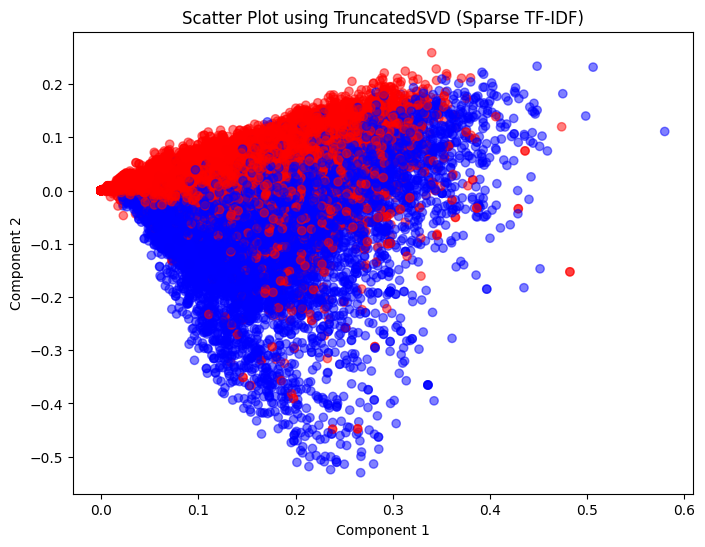

'\nClusters indicate patterns:\n    If fake and real points are separate → words differ strongly between them.\n    If they overlap → fake and real share similar language.\n'

In [12]:
from sklearn.decomposition import TruncatedSVD

tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf.fit_transform(x_train)

# TruncatedSVD handles sparse TF-IDF directly
svd = TruncatedSVD(n_components=2, random_state=42)
reduced = svd.fit_transform(tfidf_train)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=(y_train=='TRUE').map({True:'blue', False:'red'}), alpha=0.5)
plt.title('Scatter Plot using TruncatedSVD (Sparse TF-IDF)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
'''
Clusters indicate patterns:
    If fake and real points are separate → words differ strongly between them.
    If they overlap → fake and real share similar language.
'''

In [13]:
# Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

,C,1.0
,fit_intercept,True
,max_iter,50
,tol,0.001
,early_stopping,False
,validation_fraction,0.1
,n_iter_no_change,5
,shuffle,True
,verbose,0
,loss,'hinge'
,n_jobs,None


In [14]:
# Predictions
y_pred = pac.predict(tfidf_test)

In [15]:
# Evaluation
print(f"Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%")
print(confusion_matrix(y_test, y_pred))

Accuracy: 99.27%
[[4476   41]
 [  23 4202]]


In [16]:
# Save model and vectorizer
joblib.dump(pac, 'D:/Project/model/fake_news_model.pkl')
joblib.dump(tfidf, 'D:/Project/model/tfidf_vectorizer.pkl')

['D:/Project/model/tfidf_vectorizer.pkl']